In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part 5.1 a

In [8]:

def average_matrices(file_list):
    """
    Load each CSV in file_list as a 2D array and return their element‐wise mean.
    """
    # read all files into a list of 2D arrays
    mats = [np.loadtxt(fname, delimiter=',') for fname in file_list]
    # stack into shape (n_files, rows, cols) and average over axis 0
    return np.stack(mats, axis=0).mean(axis=0)

# ── example usage ──
u_files = [f'/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset5/OceanFlow/{i}u.csv' for i in range(1, 101)]
v_files = [f'/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset5/OceanFlow/{i}v.csv' for i in range(1, 101)]

avg_u = average_matrices(u_files) * (25/0.9)
avg_v = average_matrices(v_files) * (25/0.9)


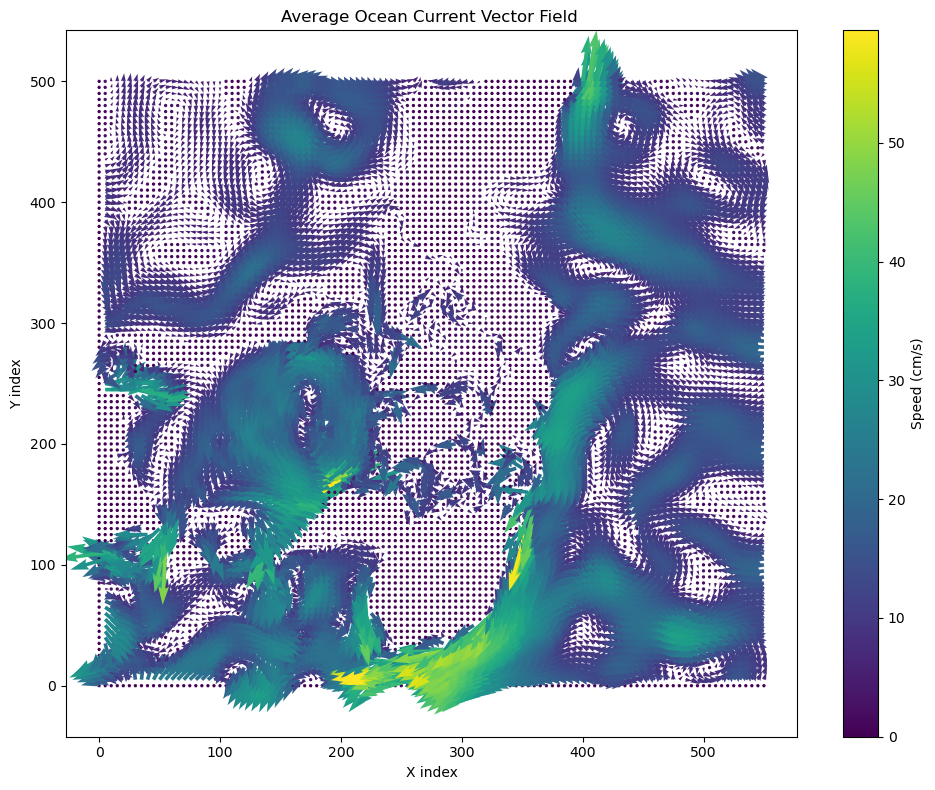

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# avg_u, avg_v = your 2D numpy arrays from before
n_rows, n_cols = avg_u.shape

# full-coordinate grid
x = np.arange(n_cols)
y = np.arange(n_rows)
X, Y = np.meshgrid(x, y)

# choose a stride (e.g. every 10th arrow)
stride = 5

# subsample everything
Xs = X[::stride, ::stride]
Ys = Y[::stride, ::stride]
Us = avg_u[::stride, ::stride]
Vs = avg_v[::stride, ::stride]
Speeds = np.sqrt(Us**2 + Vs**2)

plt.figure(figsize=(10, 8))
q = plt.quiver(
    Xs, Ys,         # sparse grid
    Us, Vs,         # corresponding vectors
    Speeds,         # color by magnitude
    angles='xy',
    scale_units='xy',
    scale=1,
    cmap='viridis',
    width=0.005      # you can tweak width too
)
plt.colorbar(q, label='Speed (cm/s)')
plt.xlabel('X index')
plt.ylabel('Y index')
plt.title('Average Ocean Current Vector Field ')
plt.axis('equal')
plt.tight_layout()
plt.savefig("flow_vec_field.png")
plt.show()


In [15]:
import numpy as np

# avg_u, avg_v are your 2D numpy arrays from before

# Step 1: compute the flow magnitude at each point
flow = np.sqrt(avg_u**2 + avg_v**2)

# Step 2: flatten and get the indices of the top 10 flow values
flat_flow   = flow.flatten()
top10_idx   = np.argsort(flat_flow)[::-1][:10]  # descending order

# Step 3: convert flat indices back to 2D grid coordinates
rows, cols = np.unravel_index(top10_idx, flow.shape)

# Step 4: collect the results
top10_flows = []
for r, c in zip(rows, cols):
    top10_flows.append({
        'row':  r,
        'col':  c,
        'u':    avg_u[r, c],
        'v':    avg_v[r, c],
        'flow': flow[r, c]
    })

# Step 5: print them out
print("Top 10 highest‐flow locations:")
for i, loc in enumerate(top10_flows, 1):
    print(f"{i:2d}. ({3*loc['row']}km, {3*loc['col']}km): "
          f"u={loc['u']:.4f}, v={loc['v']:.4f}, flow={loc['flow']:.4f} cm/s")


Top 10 highest‐flow locations:
 1. (54km, 762km): u=-61.1255, v=-15.1715, flow=62.9802 cm/s
 2. (51km, 762km): u=-61.1339, v=-14.8087, flow=62.9020 cm/s
 3. (54km, 765km): u=-60.5207, v=-16.1124, flow=62.6288 cm/s
 4. (51km, 759km): u=-61.0141, v=-13.5549, flow=62.5016 cm/s
 5. (51km, 765km): u=-60.4871, v=-15.5990, flow=62.4661 cm/s
 6. (54km, 759km): u=-60.9294, v=-13.7327, flow=62.4578 cm/s
 7. (405km, 1068km): u=-16.6628, v=-60.1305, flow=62.3965 cm/s
 8. (51km, 756km): u=-60.8942, v=-12.3010, flow=62.1242 cm/s
 9. (54km, 756km): u=-60.7332, v=-12.2938, flow=61.9649 cm/s
10. (402km, 1068km): u=-17.0937, v=-59.4559, flow=61.8644 cm/s
